Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

- Exploratory Data Analysis
- Preparing Data Feature Engineering

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
df = pd.read_csv("Spacex.csv")

In [3]:
df_1 = pd.read_csv("dataset_part_2.csv") # In this task, we use data from this CSV file

df_1.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'LandingClass'],
      dtype='object')

In [4]:
df_1.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingClass
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


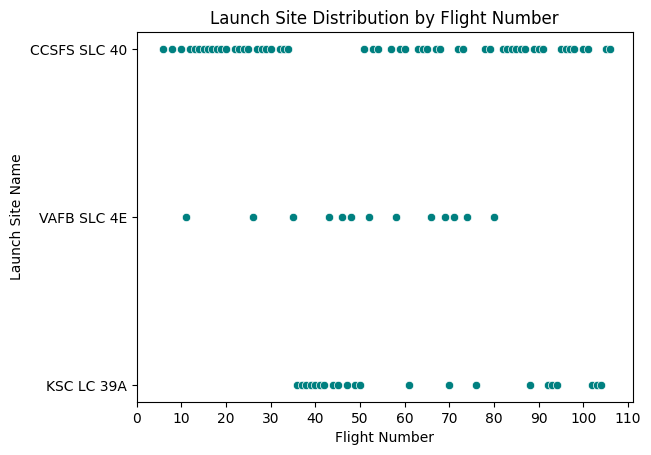

In [5]:
# Show a scatter plot of Flight Number vs. Launch Site

# Create a scatterplot
sns.scatterplot(data=df_1, x="FlightNumber", y="LaunchSite",color="teal")

# Set custom tick locations and labels
plt.xticks(range(0, 111, 10), labels=range(0, 111, 10))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel("Flight Number")
plt.ylabel("Launch Site Name")
plt.title("Launch Site Distribution by Flight Number")

# Show the plot
plt.show()


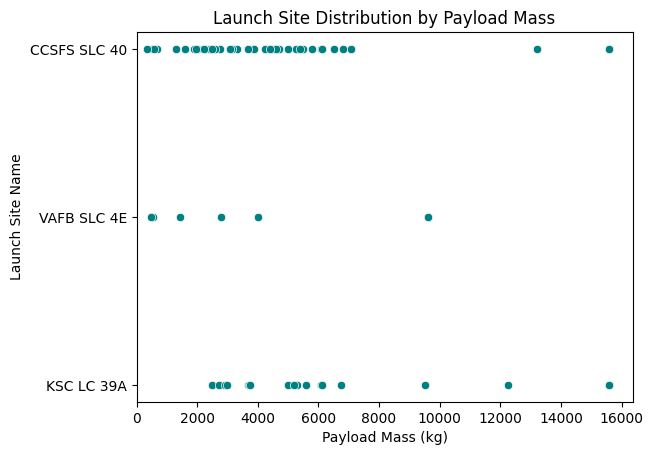

Average Payload Mass per Site:
LaunchSite
CCSFS SLC 40    5563.403508
KSC LC 39A      7644.504332
VAFB SLC 4E     5919.461538
Name: PayloadMass, dtype: float64

Unique payloads in this site:
46


In [6]:
# Show a scatter plot of Payload vs. Launch Site

# Create a scatterplot
sns.scatterplot(data=df_1, x="PayloadMass", y="LaunchSite",color="teal")

# Set the X-axis limits to start from zero
plt.xlim(0)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site Name")
plt.title("Launch Site Distribution by Payload Mass")

# Show the plot
plt.show()

print("Average Payload Mass per Site:")
print(df_1.groupby("LaunchSite")["PayloadMass"].mean())

unique_payload_site = df_1[df_1["LaunchSite"]=="CCSFS SLC 40"]
print()
print("Unique payloads in this site:")
print(len(unique_payload_site["PayloadMass"].unique()))

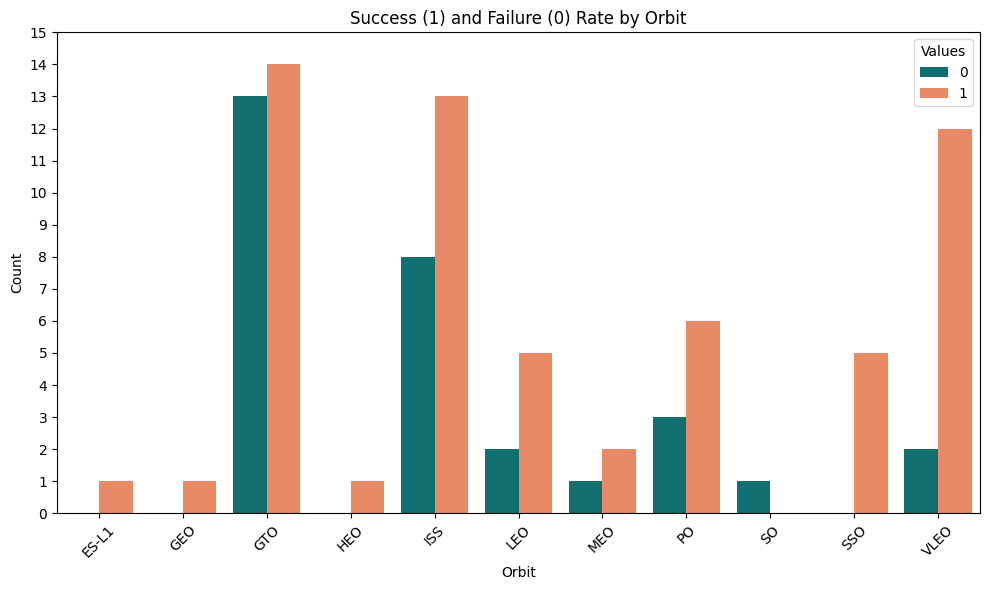

In [7]:
# Show a bar chart for the success rate of each orbit type

# Firts we choose data that we are interested
grouped_data = df_1.groupby(['Orbit', 'LandingClass']).size().unstack(fill_value=0)

# Then we reset its index
grouped_data.reset_index(inplace=True)

plt.figure(figsize=(10, 6))  # Set the figure size

# Melt the DataFrame to make it suitable for plotting
# Melt function transforms a DataFrame from wide format to long format by unpivoting the columns into rows
melted_data = grouped_data.melt(id_vars='Orbit', var_name='Value')

# Set colors for the bars
colors = ["teal", "coral"]

# Create the bar plot
sns.barplot(x='Orbit', y='value', hue='Value', data=melted_data, palette=colors)

# Set Y-axis limits from 0 to 14
plt.ylim(0, 15)

# Set Y-axis major ticks from 0 to 14
plt.yticks(range(16))

# Customize the plot
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.title('Success (1) and Failure (0) Rate by Orbit')
plt.legend(title='Values', loc='upper right')

# Show the plot
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


<Axes: xlabel='FlightNumber', ylabel='Orbit'>

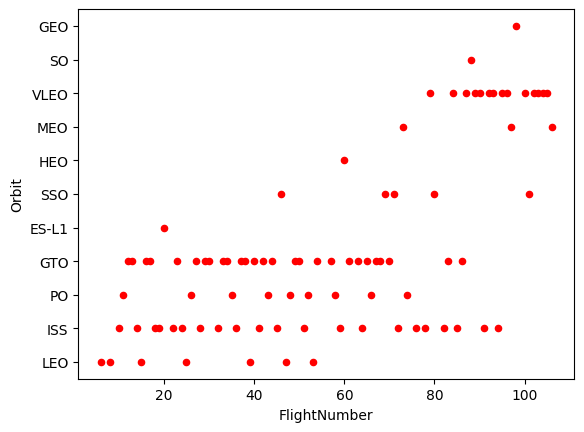

In [8]:
# Show a scatter point of Flight number vs. Orbit type

kuva_3_frame = df_1[["FlightNumber","Orbit"]]
kuva_3_frame.plot(kind="scatter",x="FlightNumber",y="Orbit",color="r")

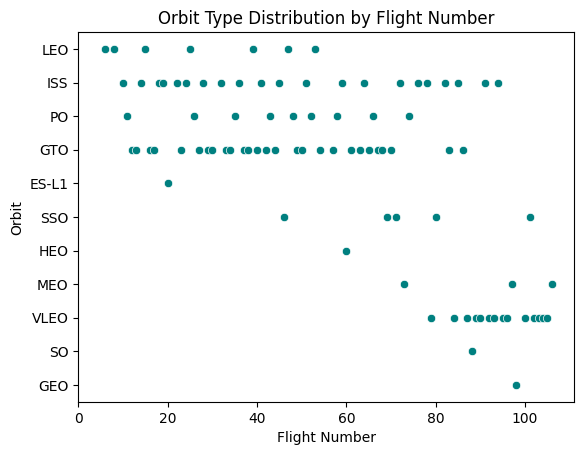

In [9]:
# Show a scatter point of Flight number vs. Orbit type

# Create a scatterplot
sns.scatterplot(data=df_1, x="FlightNumber", y="Orbit",color="teal")

# Set the X-axis limits to start from zero
plt.xlim(0)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Orbit Type Distribution by Flight Number")

# Show the plot
plt.show()

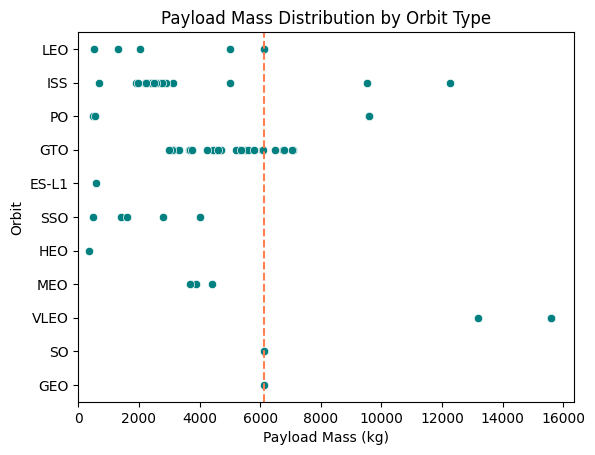

In [10]:
# Payload vs Orbit type, scatter plot

# Create a scatterplot
sns.scatterplot(data=df_1, x="PayloadMass", y="Orbit",color="teal")

# Set the X-axis limits to start from zero
plt.xlim(0)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Set a line to the plot showing the average payload mass
average_payload_mass = df_1["PayloadMass"].mean()
plt.axvline(x=average_payload_mass, color='coral', linestyle='--', label='Average Payload Mass')

# Add labels and title
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.title("Payload Mass Distribution by Orbit Type")

# Show the plot
plt.show()

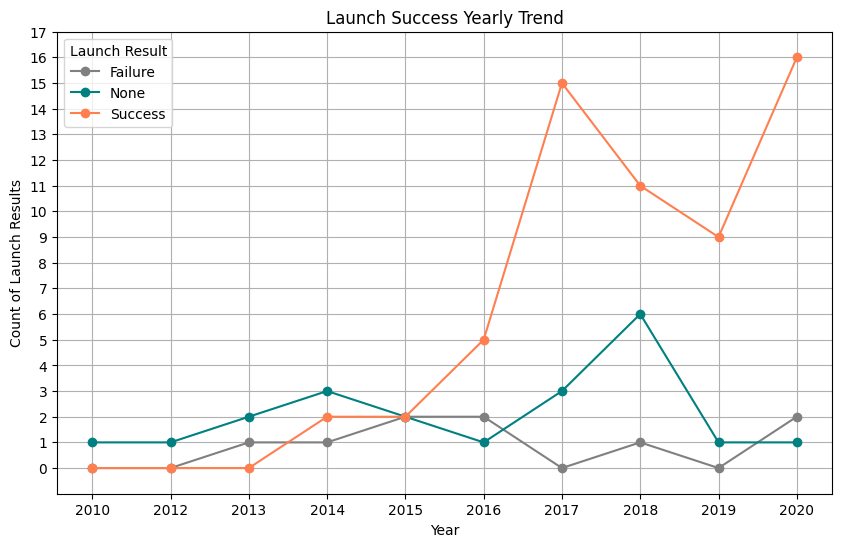

In [11]:
# Visualize the launch success yearly trend

# First we define a dictionary to map the original values to bins. This helps to visualize the data better
outcome_mapping = {
    'None None': 'None',
    'False Ocean': 'Failure',
    'True Ocean': 'Success',
    'False ASDS': 'Failure',
    'None ASDS': 'None',
    'True RTLS': 'Success',
    'True ASDS': 'Success',
    'False RTLS': 'Failure'
}

# Then we create a new column to the dataframe. Lets name this column 'Launch Result' by mapping the original 'Outcome' column
df_1['Launch Result'] = df_1['Outcome'].map(outcome_mapping)

# I also want to create another new column to the dataframe, where I put only the years. Lets call this column "Vuosi"

year=[]
def Extract_year():
    for i in df_1["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df_1['Vuosi'] = year

# Finally we can make the plot itself

# Calculate the count of each 'Launch Result' per 'Vuosi'
kuva_5_frame = df_1.groupby(['Vuosi', 'Launch Result']).size().unstack(fill_value=0)

# Create a line plot for each 'BinnedOutcome' column
kuva_5_frame.plot(kind='line', marker='o', figsize=(10, 6),color=['gray', 'teal', 'coral']) 

# Set Y-axis limits from 0 to 14
plt.ylim(-1, 17)

# Set Y-axis major ticks from 0 to 14
plt.yticks(range(18))

plt.xlabel('Year')
plt.ylabel('Count of Launch Results')
plt.title('Launch Success Yearly Trend')
plt.grid(True)  # Add grid lines if desired
plt.legend(title='Launch Result')  

# Set custom ticks on the X-axis
years = df_1["Vuosi"].unique().tolist() # To X-axis we want only the years that there has been a launch
plt.xticks(range(len(years)), years)  # Use the range of the list as positions and the years as labels

plt.show()


In [12]:
# What happended 2018?

frame_2018 = df_1[df_1["Vuosi"]=="2018"]
frame_2018["Outcome"].value_counts()

True ASDS     8
None None     6
True RTLS     2
True Ocean    1
False RTLS    1
Name: Outcome, dtype: int64

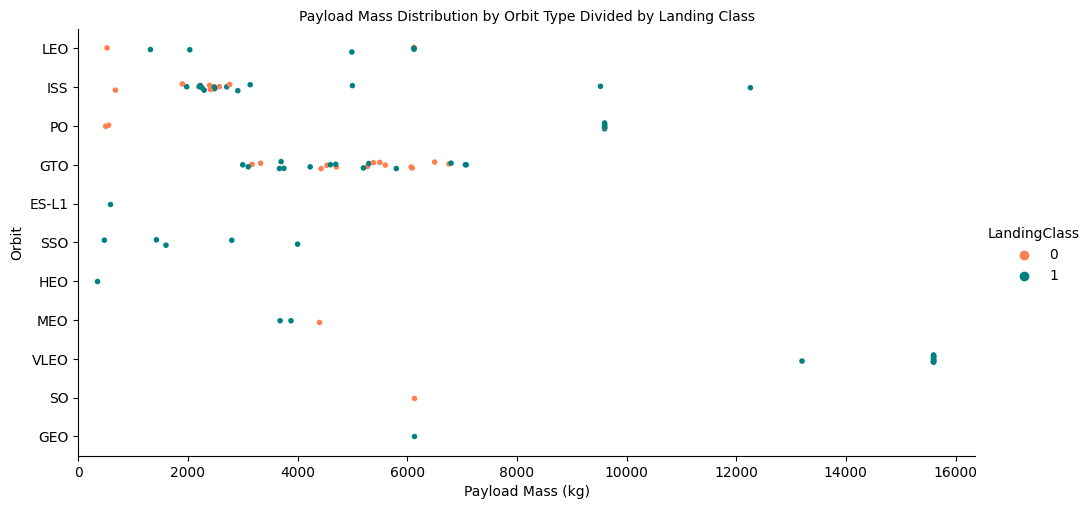

In [41]:
# Payload vs. Orbit Type with Landing Class

import plotly.express as px

# Depending on the payload mass and the orbit where Falcon 9 has been launched, the outcome of the landing varies.
# In the graph we can see a categorical scatterplot which shows as the relationship between these three variable. 
# We can for example see that the heaviest launches have been successful regardless of the orbit. 

custom_palette = {0: "coral", 1: "teal"}
sns.catplot(y='Orbit', x='PayloadMass', hue='LandingClass', data=df_1,kind='strip', aspect=2, size=4,palette=custom_palette)
plt.xlim(0)
plt.xlabel("Payload Mass (kg)", fontsize=10)
plt.ylabel("Orbit", fontsize=10)
plt.title('Payload Mass Distribution by Orbit Type Divided by Landing Class', fontsize=10)
plt.xticks(rotation=0)
plt.show()


In [42]:
# But when we check that is it really true that all heavy lauches has been succesfull, the answers is no
# SO the picture above is not a good one: it does not tell the truth easily even with modified size of the dot in the graph.. 


df_1[df_1["PayloadMass"]>15000]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,LandingClass,Launch Result,Vuosi
68,84,2019-11-11,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.577366,28.561857,1,Success,2019
71,87,2020-01-07,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1049,-80.577366,28.561857,1,Success,2020
73,89,2020-01-29,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.577366,28.561857,1,Success,2020
74,90,2020-02-17,Falcon 9,15600.0,VLEO,CCSFS SLC 40,False ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1056,-80.577366,28.561857,0,Failure,2020
76,92,2020-03-18,Falcon 9,15600.0,VLEO,KSC LC 39A,False ASDS,5,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,4,B1048,-80.603956,28.608058,0,Failure,2020
77,93,2020-04-22,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,4,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1,Success,2020
79,95,2020-06-04,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,5,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,9,B1049,-80.577366,28.561857,1,Success,2020
80,96,2020-06-13,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1059,-80.577366,28.561857,1,Success,2020
83,100,2020-08-18,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1049,-80.577366,28.561857,1,Success,2020
85,102,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1,Success,2020


In [13]:
# By now, we should obtain some preliminary insights 
# about how each important variable would affect the success rate, 
# we will select the features that will be used in success prediction in the future module.
features = df_1[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

# Eli tehtiin valinta niistä muuttujista jotka vaikuttaa Outcomeen / LandingClassiin

features.dtypes

# ELi Object tyyppisiin columneihin halutaan DUMMY. 

# Orbit          LaunchSite         LandingPad       Serial           

df_1.columns


Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'LandingClass', 'Launch Result', 'Vuosi'],
      dtype='object')

In [14]:
# Select the columns you want to one-hot encode
features = df_1[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# List of columns to one-hot encode
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Use pandas.get_dummies to one-hot encode the selected columns
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the resulting DataFrame
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Cast the entire features_one_hot DataFrame to float64
features_one_hot = features_one_hot.astype(float)

# Display the resulting DataFrame
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
eka = df_1[["Date","BoosterVersion","Outcome","Longitude","Latitude","LandingClass"]]
toka = df_1[["FlightNumber","PayloadMass","Flights","GridFins","GridFins","Reused","Legs","Block","ReusedCount"]]
kolmas = features_one_hot
# Eka, toka, and kolmas are my three DataFrames
# But toka and kolmas contains same information

# Concatenate the two unique DataFrames along columns (axis=1)
mega_dataframe = pd.concat([eka, kolmas], axis=1)

# Now mega_dataframe contains the merged data from eka and kolmas

# I can access and manipulate the mega_dataframe as needed



In [17]:
mega_dataframe.columns

Index(['Date', 'BoosterVersion', 'Outcome', 'Longitude', 'Latitude',
       'LandingClass', 'FlightNumber', 'PayloadMass', 'Flights', 'GridFins',
       'Reused', 'Legs', 'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO',
       'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO',
       'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO',
       'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B

In [18]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [19]:
features_one_hot.shape
# 90 rows, 80 columns
# This dataframe can now be used for machine learning algorithms

(90, 80)

In [20]:
df_1.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'LandingClass', 'Launch Result', 'Vuosi'],
      dtype='object')